# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [231]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import seaborn as sns
#import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations


# Packages for OLS, MLR, confusion matrix
import sklearn.metrics 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [232]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


It is needed to check upon correctness of columns' data type, presence of anomalities and get the overall grasp of the dataset

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [233]:
# Start with `.shape` and `.info()`
print(df0.shape)
print(df0.info())



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [234]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [235]:
print("Number of duplicates is "+str(df0.drop_duplicates().shape[0] - df0.shape[0]))

Number of duplicates is 0


Use `.describe()`.

In [236]:
# Use .describe()
df0.describe(include="all")


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


### Task 2b. Convert pickup & dropoff columns to datetime


In [237]:
# Convert datetime columns to datetime
df0["tpep_dropoff_datetime"] = pd.to_datetime(df0["tpep_dropoff_datetime"], format='%m/%d/%Y %I:%M:%S %p')
df0["tpep_pickup_datetime"] = pd.to_datetime(df0["tpep_pickup_datetime"], format='%m/%d/%Y %I:%M:%S %p')


In [238]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [239]:
# Create `duration` column
df0["Duration"] = (df0["tpep_dropoff_datetime"] - df0["tpep_pickup_datetime"]).astype("timedelta64[m]").astype("int")

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [240]:
df0.describe()



,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,16.526940
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.994905
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-17.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.000000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.000000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.000000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.000000


Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

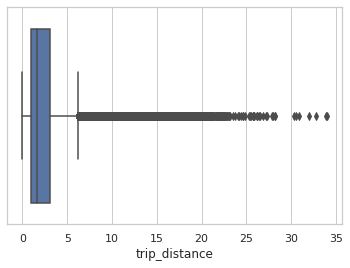

In [241]:
### YOUR CODE HERE ###
cols = [["trip_distance"], ["fare_amount"], ["Duration"]]
for col in cols[0]:
    sns.boxplot(x=col, data=df0)

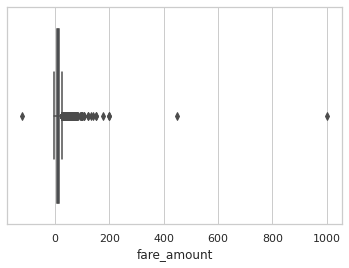

In [242]:
for col in cols[1]:
    sns.boxplot(x=col, data=df0)

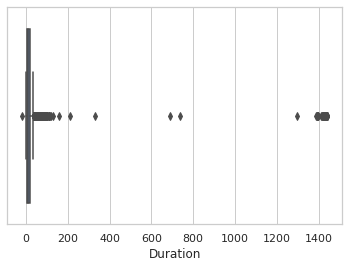

In [243]:
for col in cols[2]:
    sns.boxplot(x=col, data=df0)

In [244]:
df0.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'Duration'],
      dtype='object')

In [245]:
cols = ["trip_distance", "fare_amount", "Duration"]
for col in cols:
    df_sorted = df0.sort_values(col, ascending = False)
    print("15 Top and Down for '"+col+"' column")
    if col == "Duration":
        display(df_sorted.head(15)[["trip_distance", "fare_amount", "Duration", 'tpep_pickup_datetime', 'tpep_dropoff_datetime']])
        display(df_sorted.tail(15)[["trip_distance", "fare_amount", "Duration", 'tpep_pickup_datetime', 'tpep_dropoff_datetime']])
    elif col == "fare_amount":
        display(df_sorted.head(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])
        display(df_sorted.tail(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])
    else:
        display(df_sorted.head(15)[cols])
        display(df_sorted.tail(15)[cols])
    print("-----------------------------------------------------------------------------------------")

15 Top and Down for 'trip_distance' column


,trip_distance,fare_amount,Duration
9280,33.96,150.00,39
13861,33.92,200.01,60
6064,32.72,107.00,67
10291,31.95,131.00,37
29,30.83,80.00,209
18130,30.50,90.50,87
5792,30.33,52.00,63
15350,28.23,52.00,49
10302,28.20,52.00,51
2592,27.97,52.00,50


,trip_distance,fare_amount,Duration
16712,0.0,3.5,2
10923,0.0,3.0,1
795,0.0,8.0,0
6485,0.0,20.0,0
19636,0.0,59.0,0
13359,0.0,75.0,0
5588,0.0,2.5,0
20931,0.0,2.5,0
19712,0.0,2.5,0
13827,0.0,2.5,0


-----------------------------------------------------------------------------------------
15 Top and Down for 'fare_amount' column


,trip_distance,fare_amount,Duration,total_amount
8476,2.60,999.99,0,1200.29
20312,0.00,450.00,0,450.30
13861,33.92,200.01,60,258.21
15474,0.00,200.00,0,211.80
12511,0.00,175.00,0,233.74
3582,7.30,152.00,0,152.30
9280,33.96,150.00,39,150.30
16379,25.50,140.00,50,157.06
10291,31.95,131.00,37,131.80
11269,0.00,120.00,0,151.82


,trip_distance,fare_amount,Duration,total_amount
4402,7.06,0.0,40,0.0
314,0.12,-2.5,0,-3.8
1646,0.04,-2.5,0,-3.3
10281,0.00,-2.5,2,-4.3
5758,0.02,-2.5,0,-3.8
18565,0.10,-3.0,1,-3.8
4423,0.06,-3.0,1,-4.3
8204,0.41,-3.5,2,-4.8
20317,0.24,-3.5,2,-4.8
5448,0.25,-3.5,2,-4.3


-----------------------------------------------------------------------------------------
15 Top and Down for 'Duration' column


,trip_distance,fare_amount,Duration,tpep_pickup_datetime,tpep_dropoff_datetime
924,4.86,17.5,1439,2017-02-09 23:24:58,2017-02-10 23:24:31
15579,0.74,7.0,1439,2017-05-10 18:53:53,2017-05-11 18:53:02
21366,3.13,29.5,1438,2017-12-14 17:21:37,2017-12-15 17:19:53
22638,1.73,9.0,1438,2017-04-03 21:02:49,2017-04-04 21:01:28
6751,2.93,18.5,1438,2017-06-14 11:51:18,2017-06-15 11:49:20
7939,1.09,7.0,1438,2017-06-30 20:36:00,2017-07-01 20:34:28
15163,1.99,7.0,1438,2017-04-13 23:41:09,2017-04-14 23:39:42
14998,0.95,8.0,1438,2017-07-31 14:04:25,2017-08-01 14:03:16
6493,15.60,52.0,1437,2017-06-27 16:52:07,2017-06-28 16:49:57
18650,4.70,23.5,1436,2017-10-05 10:51:03,2017-10-06 10:48:01


,trip_distance,fare_amount,Duration,tpep_pickup_datetime,tpep_dropoff_datetime
5200,0.10,52.0,0,2017-10-25 18:08:16,2017-10-25 18:08:35
3082,0.07,2.5,0,2017-03-29 13:18:51,2017-03-29 13:19:09
20549,0.00,2.5,0,2017-06-02 18:33:13,2017-06-02 18:33:23
5195,0.00,2.5,0,2017-11-08 19:44:04,2017-11-08 19:44:07
13992,0.03,2.5,0,2017-08-14 22:03:24,2017-08-14 22:03:35
19644,0.01,52.0,0,2017-12-13 12:19:29,2017-12-13 12:19:39
5147,0.00,10.0,0,2017-12-15 23:17:49,2017-12-15 23:17:54
19636,0.00,59.0,0,2017-02-04 06:44:24,2017-02-04 06:44:25
21598,0.17,3.0,0,2017-12-18 11:47:44,2017-12-18 11:48:24
3060,0.00,2.5,0,2017-07-26 21:20:17,2017-07-26 21:20:36


-----------------------------------------------------------------------------------------


**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All variables contain outliers 


2. Upper values seem sensible whereas the bottom ones of zeroes seem to be less than 1 mile(or <0.45 miles) or just erroneous


3. As stated in the previous line, for trip distance it can make sense. For duration column it can't, because it is hardly believable there are so many trips shorter than 1 minute. In the fare amount column both upper and lower outliers are senseless - neither trip which lasted for less than a minute and took 2.6 miles can cost 999 dollar, nor the trip which took 40 mins and 7 miles can be for free

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [246]:
df0.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'Duration'],
      dtype='object')

In [247]:
# Are trip distances of 0 bad data or very short trips rounded down?
cols = ["trip_distance", "fare_amount", "Duration"]
for col in cols:
    if col == "trip_distance":
        df_sorted = df0.sort_values(col, ascending = False)
        display(df_sorted.head(15)[["trip_distance", "fare_amount", "Duration", 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount']])
        display(df_sorted.tail(15)[["trip_distance", "fare_amount", "Duration", 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount']])



,trip_distance,fare_amount,Duration,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,33.96,150.00,39,0.0,0.0,0.00,0.00,0.3,150.30
13861,33.92,200.01,60,0.0,0.5,51.64,5.76,0.3,258.21
6064,32.72,107.00,67,0.0,0.0,55.50,16.26,0.3,179.06
10291,31.95,131.00,37,0.0,0.5,0.00,0.00,0.3,131.80
29,30.83,80.00,209,0.5,0.5,18.56,11.52,0.3,111.38
18130,30.50,90.50,87,0.0,0.5,19.85,8.16,0.3,119.31
5792,30.33,52.00,63,0.0,0.5,14.64,5.76,0.3,73.20
15350,28.23,52.00,49,0.0,0.5,4.40,5.76,0.3,62.96
10302,28.20,52.00,51,0.0,0.5,11.71,5.76,0.3,70.27
2592,27.97,52.00,50,4.5,0.5,0.00,5.76,0.3,63.06


,trip_distance,fare_amount,Duration,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
16712,0.0,3.5,2,0.5,0.5,0.00,0.0,0.3,4.80
10923,0.0,3.0,1,0.0,0.5,0.00,0.0,0.3,3.80
795,0.0,8.0,0,0.0,0.5,0.00,0.0,0.3,8.80
6485,0.0,20.0,0,0.0,0.0,0.00,0.0,0.3,20.30
19636,0.0,59.0,0,0.0,0.0,11.86,0.0,0.3,71.16
13359,0.0,75.0,0,0.0,0.0,18.65,18.0,0.3,111.95
5588,0.0,2.5,0,1.0,0.5,5.20,0.0,0.3,9.50
20931,0.0,2.5,0,1.0,0.5,0.00,0.0,0.3,4.30
19712,0.0,2.5,0,0.0,0.5,0.95,0.0,0.3,4.25
13827,0.0,2.5,0,0.0,0.5,0.65,0.0,0.3,3.95


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [248]:
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [249]:
trip_dis_zeroes_count = len(df0[df0["trip_distance"] == 0])

td_zeroes_proportion = trip_dis_zeroes_count/len(df0)

print(f"Number of rows with zero in 'trip_distance' column is {trip_dis_zeroes_count}, the proportion is {td_zeroes_proportion}")

Number of rows with zero in 'trip_distance' column is 148, the proportion is 0.006520111018106524


#### `fare_amount` outliers

In [250]:
cols = ["trip_distance", "fare_amount", "Duration"]
for col in cols:
    df_sorted = df0.sort_values(col, ascending = False)
    #print("15 Top and Down for '"+col+"' column")
    if col == "fare_amount":
        display(df_sorted.head(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])
        display(df_sorted.tail(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])


,trip_distance,fare_amount,Duration,total_amount
8476,2.60,999.99,0,1200.29
20312,0.00,450.00,0,450.30
13861,33.92,200.01,60,258.21
15474,0.00,200.00,0,211.80
12511,0.00,175.00,0,233.74
3582,7.30,152.00,0,152.30
9280,33.96,150.00,39,150.30
16379,25.50,140.00,50,157.06
10291,31.95,131.00,37,131.80
11269,0.00,120.00,0,151.82


,trip_distance,fare_amount,Duration,total_amount
4402,7.06,0.0,40,0.0
314,0.12,-2.5,0,-3.8
1646,0.04,-2.5,0,-3.3
10281,0.00,-2.5,2,-4.3
5758,0.02,-2.5,0,-3.8
18565,0.10,-3.0,1,-3.8
4423,0.06,-3.0,1,-4.3
8204,0.41,-3.5,2,-4.8
20317,0.24,-3.5,2,-4.8
5448,0.25,-3.5,2,-4.3


**Question:** What do you notice about the values in the `fare_amount` column?

**Answer:** They are mostly senseless especially two on the top and those on the bottom

Impute values less than $0 with `0`.

In [251]:
# Impute values less than $0 with 0
df0["fare_amount"] = df0["fare_amount"].apply(lambda x: 0 if x<0 else x)

In [252]:
cols = ["trip_distance", "fare_amount", "Duration"]
for col in cols:
    df_sorted = df0.sort_values(col, ascending = False)
    #print("15 Top and Down for '"+col+"' column")
    if col == "fare_amount":
        display(df_sorted.head(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])
        display(df_sorted.tail(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])

,trip_distance,fare_amount,Duration,total_amount
8476,2.60,999.99,0,1200.29
20312,0.00,450.00,0,450.30
13861,33.92,200.01,60,258.21
15474,0.00,200.00,0,211.80
12511,0.00,175.00,0,233.74
3582,7.30,152.00,0,152.30
9280,33.96,150.00,39,150.30
16379,25.50,140.00,50,157.06
10291,31.95,131.00,37,131.80
11269,0.00,120.00,0,151.82


,trip_distance,fare_amount,Duration,total_amount
314,0.12,0.0,0,-3.8
19067,0.10,0.0,0,0.3
1646,0.04,0.0,0,-3.3
10506,0.00,0.0,0,0.0
14714,0.40,0.0,3,-5.3
8204,0.41,0.0,2,-4.8
18565,0.10,0.0,1,-3.8
20317,0.24,0.0,2,-4.8
5448,0.25,0.0,2,-4.3
4402,7.06,0.0,40,0.0


Now impute the maximum value as `Q3 + (6 * IQR)`.

In [253]:
def max_value_out(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
        # Reassign minimum to zero
    #if isinstance(column_list, str):
        #for i in range(len(df0)):
            #if df0.iloc[i][column_list] < 0:
                #df0.iloc = 0
    '''for col in column_list:
        for i in range(len(df0)):
            if df0.iloc[i][col] < 0:
                df0.iloc[i][col] = 0'''
            

    # Calculate upper threshold
    for col in column_list: 
        IQR = df0[col].quantile(0.75) - df0[col].quantile(0.25)
        upper_threshold = df0[col].quantile(0.75) + (iqr_factor * IQR)


    # Reassign values > threshold to threshold
    for col in column_list:
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
    
    #for col in column_list:
        #for i in range(len(df0)):
            #if df0.iloc[i][col] > upper_threshold:
                #df0.iloc = upper_threshold

In [254]:
df0["Duration"].max()

1439

In [255]:
max_value_out(["fare_amount"], 6)

In [256]:
cols = ["trip_distance", "fare_amount", "Duration"]
for col in cols:
    df_sorted = df0.sort_values(col, ascending = False)
    #print("15 Top and Down for '"+col+"' column")
    if col == "fare_amount":
        display(df_sorted.head(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])
        display(df_sorted.tail(15)[["trip_distance", "fare_amount", "Duration", "total_amount"]])

,trip_distance,fare_amount,Duration,total_amount
6878,0.00,62.5,0,99.30
7217,26.20,62.5,61,74.80
4742,0.00,62.5,0,81.14
3582,7.30,62.5,0,152.30
6783,24.61,62.5,37,65.80
15421,18.17,62.5,46,106.20
4138,26.86,62.5,72,94.75
9280,33.96,62.5,39,150.30
5368,18.00,62.5,32,80.80
7990,16.30,62.5,38,75.30


,trip_distance,fare_amount,Duration,total_amount
314,0.12,0.0,0,-3.8
19067,0.10,0.0,0,0.3
1646,0.04,0.0,0,-3.3
10506,0.00,0.0,0,0.0
14714,0.40,0.0,3,-5.3
8204,0.41,0.0,2,-4.8
18565,0.10,0.0,1,-3.8
20317,0.24,0.0,2,-4.8
5448,0.25,0.0,2,-4.3
4402,7.06,0.0,40,0.0


#### `duration` outliers


In [257]:
# Call .describe() for duration outliers
df0.describe()["Duration"]

count    22699.000000
mean        16.526940
std         61.994905
min        -17.000000
25%          6.000000
50%         11.000000
75%         18.000000
max       1439.000000
Name: Duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [258]:
# Impute a 0 for any negative values
df0["Duration"] = df0["Duration"].apply(lambda x: 0 if x<0 else x)

In [259]:
# Impute the high outliers
max_value_out(["Duration"], 6)

In [260]:
df0.describe()["Duration"]

count    22699.000000
mean        13.978986
std         11.979803
min          0.000000
25%          6.000000
50%         11.000000
75%         18.000000
max         90.000000
Name: Duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [261]:
# Create `pickup_dropoff` column
df0["pickup_dropoff"] = df0['PULocationID'].astype("str") + " " + df0['DOLocationID'].astype("str")

In [262]:
df0["pickup_dropoff"]

0        100 231
1         186 43
2        262 236
3         188 97
4          4 112
          ...   
22694     48 186
22695    132 164
22696    107 234
22697     68 144
22698    239 236
Name: pickup_dropoff, Length: 22699, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [263]:
grouped = df0.groupby("pickup_dropoff")["trip_distance"].mean()

In [264]:
grouped

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4172, dtype: float64

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [265]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [266]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0["mean_distance"] = df0["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_distance` column
df0["mean_distance"] = df0["mean_distance"].map(grouped_dict)

# Confirm that it worked
df0.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16,4 112,4.435000


In [267]:
del grouped
del grouped_dict

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [268]:
grouped1 = df0.groupby("pickup_dropoff")["Duration"].mean() 

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped1_dict = grouped1.to_dict()
df0["mean_duration"] = df0["pickup_dropoff"]
df0["mean_duration"] = df0["mean_duration"].map(grouped1_dict)

# Confirm that it worked
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14,100 231,3.521667,22.333333
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26,186 43,3.108889,23.666667
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7,262 236,0.881429,6.771429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30,188 97,3.700000,30.000000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16,4 112,4.435000,14.000000


In [269]:
del grouped1
del grouped1_dict

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [270]:
df0["day"] = df0["tpep_pickup_datetime"].dt.strftime('%A')
df0["month"] = df0["tpep_pickup_datetime"].dt.strftime('%B')
df0["hour"] = df0["tpep_pickup_datetime"].dt.hour

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [271]:
# Create 'rush_hour' col
df0["rush_hour"] = None

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0["rush_hour"] = df0["day"].apply(lambda x: 0 if x=="Saturday" or x=="Sunday" else None)

In [272]:
def rush_hourizer(): 
    for i in range(len(df0)):
        if df0.iloc[i]["day"] in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]:    
            if df0.iloc[i]["hour"] in [6,7,8,9,10,16,17,18,19,20]:
                df0.loc[i, "rush_hour"] = 1
            else:
                df0.loc[i, "rush_hour"] = 0

In [273]:
rush_hourizer()

In [274]:
df0.head(10)[["rush_hour", "day", "hour"]]

,rush_hour,day,hour
0,0.0,Saturday,8
1,0.0,Tuesday,14
2,1.0,Friday,7
3,0.0,Sunday,13
4,0.0,Saturday,23
5,0.0,Saturday,20
6,1.0,Wednesday,19
7,1.0,Tuesday,17
8,0.0,Saturday,16
9,0.0,Friday,15


`payment_type` to categorical variable

In [275]:
# Change the data type of 'payment_type' column
df0['payment_type'] = df0['payment_type'].astype("str")

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

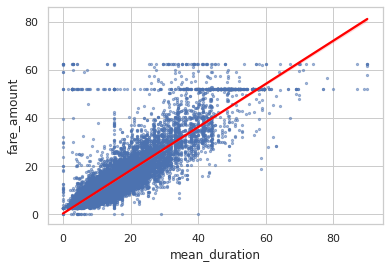

In [276]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set(style='whitegrid')
sns.regplot(x="mean_duration", y="fare_amount", data=df0,
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [277]:
df0["fare_amountOBJ"] = df0["fare_amount"].astype("str")
df0["fare_amountOBJ"].value_counts().reset_index().head()

,index,fare_amountOBJ
0,6.0,1163
1,6.5,1089
2,5.5,1081
3,7.0,1067
4,7.5,1018


Examine the first 30 of these trips.

In [278]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df0_52_fare = df0.loc[df0["fare_amount"] == 52]
df0_52_fare.head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration,pickup_dropoff,mean_distance,mean_duration,day,month,hour,rush_hour,fare_amountOBJ
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36,236 132,19.211667,40.333333,Sunday,March,19,0.0,52.0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66,132 163,19.229000,52.400000,Saturday,June,14,0.0,52.0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0,132 132,2.255862,2.689655,Saturday,November,20,0.0,52.0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29,132 79,19.431667,46.666667,Wednesday,December,23,0.0,52.0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29,132 234,17.654000,49.200000,Sunday,September,23,0.0,52.0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39,132 48,18.761905,57.714286,Tuesday,February,18,1.0,52.0
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15,228 88,4.730000,15.000000,Monday,June,12,0.0,52.0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45,132 48,18.761905,57.714286,Thursday,August,22,0.0,52.0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42,186 132,17.096000,42.200000,Tuesday,September,13,0.0,52.0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71,132 148,17.994286,45.857143,Sunday,April,21,0.0,52.0


In [279]:
# Removing rows with fare amount 52
#df0 = df0[df0["fare_amount"] != 52]

In [280]:
df0 = df0.reset_index(drop=True)

In [281]:
del df0_52_fare

**Question:** What do you notice about the first 30 trips?

All trips' information is different and it is hard to notice what exactly makes the price to be exactly 52 dollars

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [282]:
df0.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'Duration',
       'pickup_dropoff', 'mean_distance', 'mean_duration', 'day', 'month',
       'hour', 'rush_hour', 'fare_amountOBJ'],
      dtype='object')

In [283]:
#df_prepared = df0.drop(columns = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'fare_amountOBJ', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'hour', 'day', 'month', 'store_and_fwd_flag', 'trip_distance','Duration', 'PULocationID', 'DOLocationID','passenger_count'])

In [284]:
df_prepared = df0[['VendorID', 'passenger_count', 'payment_type', 'fare_amount', 'mean_distance',
       'mean_duration', 'rush_hour']]

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

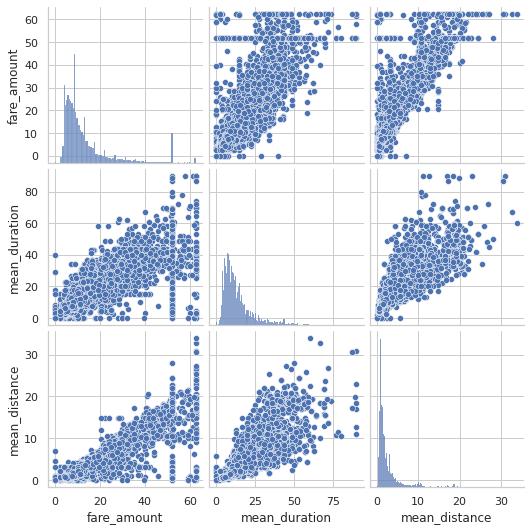

In [285]:
# Create a pairplotii to visualize pairwise relationships between variables in the data
sns.pairplot(df_prepared[["fare_amount", "mean_duration", "mean_distance"]])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [286]:
# Correlation matrix to help determine most correlated variables
df_prepared.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001702,-0.000752
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015794,-0.024283
fare_amount,0.001045,0.014942,1.000000,0.910185,0.858797,-0.025901
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874374,-0.046794
mean_duration,0.001702,0.015794,0.858797,0.874374,1.000000,-0.027405
rush_hour,-0.000752,-0.024283,-0.025901,-0.046794,-0.027405,1.000000


Visualize a correlation heatmap of the data.

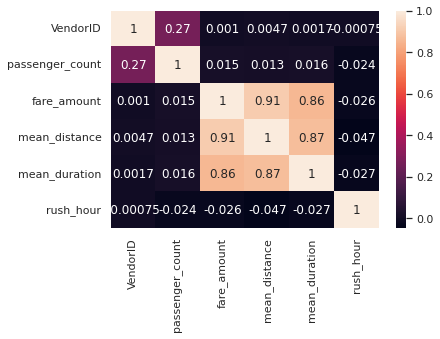

In [287]:
# Create correlation heatmap
sns.heatmap(df_prepared.corr(method='pearson'), annot=True)

`mean_duration` column is correlated with another predictor variable `mean_distance`. However, because in our case model's result is more important than using as the tool for studying data we avoid dropping either of these columns 

In [288]:
#df_prepared.drop(columns="mean_duration", axis=1, inplace=True)

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Fare amount is highly correlated with trip's mean distance and duration

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [289]:
"It is done later in the next step"

'It is done later in the next step'

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

### Task 8b. Pre-process data


Dummy encode categorical variables

In [290]:
# Convert VendorID to string
df_prepared["VendorID"] = df_prepared["VendorID"].astype("str")

In [291]:
cols_to_transform = ['VendorID', 'payment_type']
# Get dummies
encoder = OneHotEncoder()

# Fit and transform the 'category' column into one-hot encoded vectors
one_hot_encoded = encoder.fit_transform(df_prepared[cols_to_transform]).toarray()

# Create a new DataFrame with the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names(cols_to_transform))

# Concatenate the new DataFrame with the original DataFrame
data_encoded = pd.concat([df_prepared.reset_index(drop=True), one_hot_encoded_df.reset_index(drop=True)], axis=1)

# Drop the original columns that were encoded if needed
data_encoded.drop(cols_to_transform, axis=1, inplace=True)

In [292]:
del one_hot_encoded
del one_hot_encoded_df

In [293]:
data_encoded.head()

,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour,VendorID_1,VendorID_2,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,6,13.0,3.521667,22.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,16.0,3.108889,23.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,6.5,0.881429,6.771429,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,20.5,3.700000,30.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1,16.5,4.435000,14.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [294]:
# Standardize the mean_distance column
"""cols_to_normalize = "mean_distance"

scaler = StandardScaler()

X_scaled = scaler.fit_transform(np.array(X[cols_to_normalize]).reshape(-1,1))

data_encoded["mean_distanceNORM"] = X_scaled"""

'cols_to_normalize = "mean_distance"\n\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(np.array(X[cols_to_normalize]).reshape(-1,1))\n\ndata_encoded["mean_distanceNORM"] = X_scaled'

In [295]:
data_encoded.head()

,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour,VendorID_1,VendorID_2,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,6,13.0,3.521667,22.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,16.0,3.108889,23.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,6.5,0.881429,6.771429,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,20.5,3.700000,30.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1,16.5,4.435000,14.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [296]:
X = data_encoded.drop(columns="fare_amount")
#X_norm = data_encoded.drop(columns=["fare_amount", "mean_distance"])

In [297]:
y = data_encoded["fare_amount"]

In [298]:
len(X) == len(y)

True

In [299]:
# Standardize the X variables
cols_to_normalize = ["mean_duration", "mean_distance"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X[cols_to_normalize])

X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_normalize)

X_inner = X.drop(cols_to_normalize, axis=1)

X_final = pd.concat([X_inner, X_scaled_df], axis=1)

In [300]:
'''del X_inner
del X_scaled_df
del X_scaled'''

'del X_inner\ndel X_scaled_df\ndel X_scaled'

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [301]:
X = X_final = sm.add_constant(X_final)

In [302]:
X.head()

,const,passenger_count,rush_hour,VendorID_1,VendorID_2,payment_type_1,payment_type_2,payment_type_3,payment_type_4,mean_duration,mean_distance
0,1.0,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.827871,0.170938
1,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.959997,0.054954
2,1.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.714230,-0.570928
3,1.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.587597,0.221047
4,1.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.002082,0.427571


In [303]:
#X_norm = sm.add_constant(X_norm)

In [304]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [305]:
# Fit your model to the training data
model = sm.OLS(y_train, X_train)
results = model.fit()

# Normalized Data(skipped)

In [306]:
#X_trainNORM, X_testNORM, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

In [307]:
# Fit your model to the training data
#modelNORM = sm.OLS(y_train, X_trainNORM)
#resultsNORM = modelNORM.fit()

--------------------------------------------------------------------------------

Instantiate your model and fit it to the training data.

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [308]:
# Evaluate the model performance on the training data
print("Results for non-standardized X model")
results.summary()
#print("Results for standardized X model")
#print(resultsNORM.summary())

Results for non-standardized X model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:06:18   Log-Likelihood:                -51947.
No. Observations:               18159   AIC:                         1.039e+05
Df Residuals:                   18150   BIC:                         1.040e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9919      0.123     56.754      0.000       6.750       7.233
passenger_count     0.0247      0.025      0.975      0.329      -0.025       0.074
rush_hour           0.2447      0.065      3.758      0.000       0.117       0.372
VendorID_1          3.5546      0.067     53.101      0.000       3.423       3.686
VendorID_2          3.4373      0.073     47.356      0.000       3.295       3.580
payment_type_1      2.3185      0.183     12.646      0.000       1.959       2.678
payment_type_2      2.2389      0.186     12.048      0.000       1.875       2.603
payment_type_3      2.0022      0.378      5.295      0.000       1.261       2.743
payment_type_4      0.4323      0.570      0.759      0.448      -0.685       1.549
mean_duration       2.8000      0.064     43.438      0.000       2.674       2.926
mean_distance       7.1099      0.064    110.537      0.000       6.984       7.236
==============================================================================
Omnibus:                    21364.223   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3401331.598
Skew:                           6.140   Prob(JB):                         0.00
Kurtosis:                      68.914   Cond. No.                     5.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [309]:
2+1

3

In [310]:
# y_true: true values of the dependent variable
# y_pred: predicted values of the dependent variable
def calculate_errors(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    return mae, mse, rmse


In [311]:
y_pred_train = results.predict(X_train)
mae0, mse0, rmse0 = calculate_errors(y_train, y_pred_train)

print(f"the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error are {mae0}, {mse0}, {rmse0} respectively ")

the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error are 2.186902983717173, 17.875418074000567, 4.2279330735006395 respectively 


In [312]:
#y_pred_trainNORM = resultsNORM.predict(X_trainNORM)
#mae0, mse0, rmse0 = calculate_errors(y_train, y_pred_trainNORM)

#print(f"the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error for standardized are {mae0}, {mse0}, {rmse0} respectively ")

### Test data

Calculate the same metrics on the test data.

In [313]:
y_pred_test = results.predict(X_test)

In [314]:
mae1, mse1, rmse1 = calculate_errors(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error for testing data are {mae1}, {mse1}, {rmse1} respectively.\nR2 score equals {r2}")

the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error for testing data are 2.136088824453245, 14.340862396576117, 3.786933112239523 respectively.
R2 score equals 0.8681258704703283


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [315]:
# Create a `results` dataframe
residuals = y_test - y_pred_test



In [316]:
results1 = pd.DataFrame({"test_data":y_test, "predicted":y_pred_test,"residuals":residuals})

In [317]:
results1.head()

,test_data,predicted,residuals
5818,14.0,12.410239,1.589761
18134,28.0,16.470924,11.529076
4655,5.5,6.737970,-1.237970
7378,15.5,16.166436,-0.666436
13914,9.5,10.440895,-0.940895


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

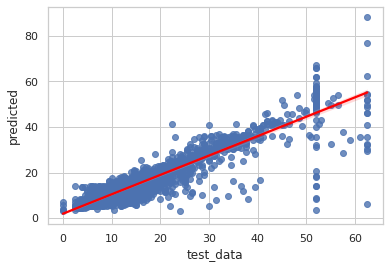

In [318]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.regplot(x="test_data", y="predicted", data=results1, line_kws={'color':'red'})

Visualize the distribution of the `residuals` using a histogram.

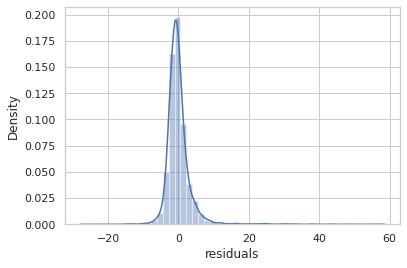

In [319]:
# Visualize the distribution of the `residuals`
sns.distplot(results1["residuals"], bins=50)



In [320]:
# Calculate residual mean
residual_mean = results1["residuals"].mean()
print(f"Residual mean is {residual_mean}")

Residual mean is -0.013850767745953183


Create a scatterplot of `residuals` over `predicted`.

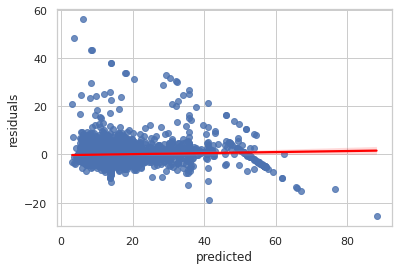

In [321]:
# Create a scatterplot of `residuals` over `predicted`
sns.regplot(x="predicted", y="residuals", data=results1,line_kws={'color':'red'})

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [322]:
# Output the model's coefficients
pd.DataFrame(results.params)

,0
const,6.991924
passenger_count,0.024667
rush_hour,0.244678
VendorID_1,3.554629
VendorID_2,3.437295
payment_type_1,2.318516
payment_type_2,2.238938
payment_type_3,2.002155
payment_type_4,0.432315
mean_duration,2.800044


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?
<br> - Thorough data cleansing and manipulation are required to perform quality linear regression analysis and build reliable model
<br> - Method of trial and error is needed to achieve the best performance of the model


2. What results can be presented from this notebook?
<br>The working model is prepared. Now the team can advance to deployment stage after presenting the results to TLC colleagues

